In [86]:
import os
import sys
import pyreadr
import pandas as pd

import numpy as np
from datetime import datetime as dt
import calendar
import matplotlib.pyplot as plt

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
data_dir = '/Users/maoyabassiouni/Documents/DATA/Projects/OLNI'

## TO DO

update/check 'species_parameters.csv'

# sites

In [90]:
df_locs = pd.read_csv(os.path.join(data_dir, 'sites', 'all_icp_sites.csv'))
locations = list(zip(df_locs.lon, df_locs.lat, df_locs.code_tree_species))
df_locs['sp'] = df_locs['code_tree_species']

# Combine variables long-term mean

In [91]:
df_all = df_locs

df_all['Lat'] = np.round(df_all['lat'], 4)
df_all['Lon'] = np.round(df_all['lon'], 4)
df_all = df_all.drop(['year', 'lat', 'lon', ], axis=1)
df_all = df_all.groupby(['Lat', 'Lon', 'code_tree_species']).mean()

df_all

n  ymin  ymax  count  yrange     sp
Lat     Lon     code_tree_species                                             
34.9294 32.9311 121.0               9.772500  2005  2011      4       6  121.0
                129.0               8.696250  2005  2011      4       6  129.0
34.9522 32.8306 129.0               7.951250  2005  2011      4       6  129.0
35.0139 33.0500 121.0              11.116250  2005  2011      4       6  121.0
35.0200 32.6275 121.0               9.713750  2005  2011      4       6  121.0
...                                      ...   ...   ...    ...     ...    ...
67.9994 24.2361 118.0               9.700758  1995  2015     11      20  118.0
68.9953 19.4275 118.0              12.715000  1995  1999      3       4  118.0
69.4542 30.0361 134.0              11.912000  1995  2003      5       8  134.0
69.5831 28.8981 134.0              12.803636  1995  2015     11      20  134.0
69.7389 26.9581 134.0              11.593125  1995  2009      8      14  134.0

[996 rows x 6 columns]

In [92]:
df_co2 = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'co2_annual.csv'))
df_co2 = df_co2.drop([ 'Unnamed: 0'], axis=1)

df_all['CO2'] = np.mean(df_co2['CO2'])
df_all

n  ymin  ymax  count  yrange  \
Lat     Lon     code_tree_species                                         
34.9294 32.9311 121.0               9.772500  2005  2011      4       6   
                129.0               8.696250  2005  2011      4       6   
34.9522 32.8306 129.0               7.951250  2005  2011      4       6   
35.0139 33.0500 121.0              11.116250  2005  2011      4       6   
35.0200 32.6275 121.0               9.713750  2005  2011      4       6   
...                                      ...   ...   ...    ...     ...   
67.9994 24.2361 118.0               9.700758  1995  2015     11      20   
68.9953 19.4275 118.0              12.715000  1995  1999      3       4   
69.4542 30.0361 134.0              11.912000  1995  2003      5       8   
69.5831 28.8981 134.0              12.803636  1995  2015     11      20   
69.7389 26.9581 134.0              11.593125  1995  2009      8      14   

                                      sp        CO2  
Lat     Lon     code_tree_species                    
34.9294 32.9311 121.0              121.0  352.66431  
                129.0              129.0  352.66431  
34.9522 32.8306 129.0              129.0  352.66431  
35.0139 33.0500 121.0              121.0  352.66431  
35.0200 32.6275 121.0              121.0  352.66431  
...                                  ...        ...  
67.9994 24.2361 118.0              118.0  352.66431  
68.9953 19.4275 118.0              118.0  352.66431  
69.4542 30.0361 134.0              134.0  352.66431  
69.5831 28.8981 134.0              134.0  352.66431  
69.7389 26.9581 134.0              134.0  352.66431  

[996 rows x 7 columns]

In [93]:
data_ERA5 = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'era5_annual.csv'))
data_ERA5['Lat'] = np.round(data_ERA5['Lat'], 4)
data_ERA5['Lon'] = np.round(data_ERA5['Lon'], 4)
data_ERA5 = data_ERA5.groupby(['Lon', 'Lat']).mean()
data_ERA5 = data_ERA5.drop(['year',  'Unnamed: 0'], axis=1)

data_ERA5['tmp'] = data_ERA5['mean_2m_air_temperature']
data_ERA5['tmp_gs'] = data_ERA5['mean_2m_air_temperature_gs']
data_ERA5['tmp_gs_peak'] = data_ERA5['mean_2m_air_temperature_gs_peak']

data_ERA5['pre'] = data_ERA5['total_precipitation']
data_ERA5['pre_gs'] = data_ERA5['total_precipitation_gs']
data_ERA5['pre_gs_peak'] = data_ERA5['total_precipitation_gs_peak']

data_ERA5['pa'] = data_ERA5['surface_pressure']
data_ERA5['pa_gs'] = data_ERA5['surface_pressure_gs']
data_ERA5['pa_gs_peak'] = data_ERA5['surface_pressure_gs_peak']

data_ERA5 = data_ERA5.drop(['mean_2m_air_temperature', 'mean_2m_air_temperature_gs', 'mean_2m_air_temperature_gs_peak',
                           'total_precipitation', 'total_precipitation_gs', 'total_precipitation_gs_peak',
                           'surface_pressure', 'surface_pressure_gs', 'surface_pressure_gs_peak',], 
                           axis=1)

keys = data_ERA5.keys()
print(keys)
for kk in keys:
    data_ERA5['ERA5_%s_LTavg' % kk] = data_ERA5[kk]
    data_ERA5 = data_ERA5.drop([kk,], axis=1)
df_all = pd.merge(df_all, data_ERA5, on =['Lat', 'Lon', ], how='outer')
df_all

Index(['rf_alpha', 'rf_lambda', 'rf_alpha_gs', 'rf_lambda_gs', 'tmp', 'tmp_gs',
       'tmp_gs_peak', 'pre', 'pre_gs', 'pre_gs_peak', 'pa', 'pa_gs',
       'pa_gs_peak'],
      dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ERA5_rf_lambda_gs_LTavg  \
Lat     Lon                                                        
34.9294 32.9311                0.003355                 0.175035   
        32.9311                0.003355                 0.175035   
34.9522 32.8306                0.003355                 0.175035   
35.0139 33.0500                0.004419                 0.137576   
35.0200 32.6275                0.002634                 0.098248   
...                                 ...                      ...   
67.9994 24.2361                0.003262                 0.806740   
68.9953 19.4275                0.003248                 1.181364   
69.4542 30.0361                0.003103                 0.782925   
69.5831 28.8981                0.003119                 0.808581   
69.7389 26.9581                0.002906                 0.804773   

                 ERA5_tmp_LTavg  ERA5_tmp_gs_LTavg  ERA5_tmp_gs_peak_LTavg  \
Lat     Lon                                                                  
34.9294 32.9311       17.614843          22.810494               24.208962   
        32.9311       17.614843          22.810494               24.208962   
34.9522 32.8306       17.614843          22.810494               24.208962   
35.0139 33.0500       19.733973          22.484276               17.179418   
35.0200 32.6275       19.919867          23.322647               23.834744   
...                         ...                ...                     ...   
67.9994 24.2361        0.238479          11.064238               14.251043   
68.9953 19.4275        0.028312          10.492499               12.014457   
69.4542 30.0361        0.452906          10.353836               13.029941   
69.5831 28.8981        0.013759           9.761778               12.371119   
69.7389 26.9581       -0.488500           9.670618               12.530519   

                 ERA5_pre_LTavg  ERA5_pre_gs_LTavg  ERA5_pre_gs_peak_LTavg  \
Lat     Lon                                                                  
34.9294 32.9311        0.001429           0.000557                0.000210   
        32.9311        0.001429           0.000557                0.000210   
34.9522 32.8306        0.00142

In [94]:
data_ERA5 = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'era5_annual.csv'))
data_ERA5['Lat'] = np.round(data_ERA5['Lat'], 4)
data_ERA5['Lon'] = np.round(data_ERA5['Lon'], 4)
data_ERA5 = data_ERA5.groupby(['Lon', 'Lat']).std()
data_ERA5 = data_ERA5.drop(['year',  'Unnamed: 0'], axis=1)

data_ERA5['tmp'] = data_ERA5['mean_2m_air_temperature']
data_ERA5['tmp_gs'] = data_ERA5['mean_2m_air_temperature_gs']
data_ERA5['tmp_gs_peak'] = data_ERA5['mean_2m_air_temperature_gs_peak']

data_ERA5['pre'] = data_ERA5['total_precipitation']
data_ERA5['pre_gs'] = data_ERA5['total_precipitation_gs']
data_ERA5['pre_gs_peak'] = data_ERA5['total_precipitation_gs_peak']

data_ERA5['pa'] = data_ERA5['surface_pressure']
data_ERA5['pa_gs'] = data_ERA5['surface_pressure_gs']
data_ERA5['pa_gs_peak'] = data_ERA5['surface_pressure_gs_peak']

data_ERA5 = data_ERA5.drop(['mean_2m_air_temperature', 'mean_2m_air_temperature_gs', 'mean_2m_air_temperature_gs_peak',
                           'total_precipitation', 'total_precipitation_gs', 'total_precipitation_gs_peak',
                           'surface_pressure', 'surface_pressure_gs', 'surface_pressure_gs_peak',], 
                           axis=1)

keys = data_ERA5.keys()
print(keys)
for kk in keys:
    data_ERA5['ERA5_%s_LTstd' % kk] = data_ERA5[kk]
    data_ERA5 = data_ERA5.drop([kk,], axis=1)
df_all = pd.merge(df_all, data_ERA5, on =['Lat', 'Lon', ], how='outer')
df_all

Index(['rf_alpha', 'rf_lambda', 'rf_alpha_gs', 'rf_lambda_gs', 'tmp', 'tmp_gs',
       'tmp_gs_peak', 'pre', 'pre_gs', 'pre_gs_peak', 'pa', 'pa_gs',
       'pa_gs_peak'],
      dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  ERA5_rf_lambda_gs_LTstd  \
Lat     Lon                              ...                            
34.9294 32.9311                0.003355  ...                 0.059080   
        32.9311                0.003355  ...                 0.059080   
34.9522 32.8306                0.003355  ...                 0.059080   
35.0139 33.0500                0.004419  ...                 0.043999   
35.0200 32.6275                0.002634  ...                 0.035957   
...                                 ...  ...                      ...   
67.9994 24.2361                0.003262  ...                 0.214199   
68.9953 19.4275                0.003248  ...                 0.376313   
69.4542 30.0361                0.003103  ...                 0.181630   
69.5831 28.8981                0.003119  ...                 0.201871   
69.7389 26.9581                0.002906  ...                 0.211667   

                 ERA5_tmp_LTstd  ERA5_tmp_gs_LTstd  ERA5_tmp_gs_peak_LTstd  \
Lat     Lon                                                                  
34.9294 32.9311        0.623375           0.621065                0.974899   
        32.9311        0.623375           0.621065                0.974899   
34.9522 32.8306        0.623375           0.621065                0.974899   
35.0139 33.0500        0.635146           0.716539                1.197809   
35.0200 32.6275        0.541059           0.558214                0.661709   
...                         ...                ...                     ...   
67.9994 24.2361        0.696155           0.850907                1.522355   
68.9953 19.4275        0.898309           0.881658                1.461485   
69.4542 30.0361        0.935202           0.954556                1.594789   
69.5831 28.8981        0.893621           0.912517                1.514333   
69.7389 26.9581        0.866991           0.846851                1.530281   

                 ERA5_pre_LTstd  ERA5_pre_gs_LTstd  ERA5_pre_gs_peak_LTstd  \
Lat     Lon                                                                  
34.9294 32.9311        0.000365           0.000224                0.000208   
        32.9311        0.000365           0

In [95]:
data_TC = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'tc_annual.csv'))
data_TC['Lat'] = np.round(data_TC['Lat'], 4)
data_TC['Lon'] = np.round(data_TC['Lon'], 4)
data_TC = data_TC.groupby(['Lon', 'Lat']).mean()
data_TC = data_TC.drop(['year', 'month_gs', 'month_gs_peak',  'Unnamed: 0'], axis=1)
data_TC['pre'] = data_TC['pr']
data_TC['pre_gs'] = data_TC['pr_gs']
data_TC['pre_gs_peak'] = data_TC['pr_gs_peak']
data_TC = data_TC.drop(['pr', 'pr_gs', 'pr_gs_peak'], axis=1)

data_TC['tmp'] = data_TC['tmean']
data_TC['tmp_gs'] = data_TC['tmean_gs']
data_TC['tmp_gs_peak'] = data_TC['tmean_gs_peak']

data_TC['par'] = data_TC['srad'] * 2.04 * 10 ** (-6) * 60 * 60 * 24 #mol / m2/d
data_TC['par_gs'] = data_TC['srad_gs'] * 2.04 * 10 ** (-6) * 60 * 60 * 24 
data_TC['par_gs_peak'] = data_TC['srad_gs_peak'] * 2.04 * 10 ** (-6) * 60 * 60 * 24 

keys = data_TC.keys()
print(keys)
for kk in keys:
    data_TC['TC_%s_LTavg' % kk] = data_TC[kk]
    data_TC = data_TC.drop([kk,], axis=1)
df_all = pd.merge(df_all, data_TC, on =['Lat', 'Lon', ], how='outer')
df_all

Index(['srad', 'pet', 'aet', 'def', 'pdsi', 'ro', 'soil', 'tmmn', 'tmmx',
       'vap', 'vpd', 'vs', 'days_month', 'tmean', 'aet_gs', 'def_gs',
       'pdsi_gs', 'pet_gs', 'ro_gs', 'soil_gs', 'srad_gs', 'tmean_gs',
       'tmmn_gs', 'tmmx_gs', 'vap_gs', 'vpd_gs', 'vs_gs', 'aet_gs_peak',
       'def_gs_peak', 'pdsi_gs_peak', 'pet_gs_peak', 'ro_gs_peak',
       'soil_gs_peak', 'srad_gs_peak', 'tmean_gs_peak', 'tmmn_gs_peak',
       'tmmx_gs_peak', 'vap_gs_peak', 'vpd_gs_peak', 'vs_gs_peak', 'pre',
       'pre_gs', 'pre_gs_peak', 'tmp', 'tmp_gs', 'tmp_gs_peak', 'par',
       'par_gs', 'par_gs_peak'],
      dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  TC_vs_gs_peak_LTavg  \
Lat     Lon                              ...                        
34.9294 32.9311                0.003355  ...             2.490370   
        32.9311                0.003355  ...             2.490370   
34.9522 32.8306                0.003355  ...             2.859259   
35.0139 33.0500                0.004419  ...             3.000000   
35.0200 32.6275                0.002634  ...             2.767778   
...                                 ...  ...                  ...   
67.9994 24.2361                0.003262  ...             2.616296   
68.9953 19.4275                0.003248  ...             2.255556   
69.4542 30.0361                0.003103  ...             3.335185   
69.5831 28.8981                0.003119  ...             2.867778   
69.7389 26.9581                0.002906  ...             2.597407   

                 TC_pre_LTavg  TC_pre_gs_LTavg  TC_pre_gs_peak_LTavg  \
Lat     Lon                                                            
34.9294 32.9311      0.002379         0.000798              0.000638   
        32.9311      0.002379         0.000798              0.000638   
34.9522 32.8306      0.002149         0.000708              0.000574   
35.0139 33.0500      0.001613         0.000661              0.000870   
35.0200 32.6275      0.002032         0.000703              0.000612   
...                       ...              ...                   ...   
67.9994 24.2361      0.001537         0.002345              0.003016   
68.9953 19.4275      0.001535         0.001862              0.002084   
69.4542 30.0361      0.001413         0.001947              0.002246   
69.5831 28.8981      0.001304         0.001830              0.002180   
69.7389 26.9581      0.001195         0.001763              0.002134   

                 TC_tmp_LTavg  TC_tmp_gs_LTavg  TC_tmp_gs_peak_LTavg  \
Lat     Lon                                                            
34.9294 32.9311     13.782155        18.853086             19.942593   
        32.9311     13.782155        18.853086             19.942593   
34.9522 32.8306     14.433614        19.346605             20.475926   
35.0139 33.0500     17.593533        20.421914 

In [96]:
data_TC = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'tc_annual.csv'))
data_TC['Lat'] = np.round(data_TC['Lat'], 4)
data_TC['Lon'] = np.round(data_TC['Lon'], 4)
data_TC = data_TC.groupby(['Lon', 'Lat']).std()
data_TC = data_TC.drop(['year', 'month_gs', 'month_gs_peak',  'Unnamed: 0'], axis=1)
data_TC['pre'] = data_TC['pr']
data_TC['pre_gs'] = data_TC['pr_gs']
data_TC['pre_gs_peak'] = data_TC['pr_gs_peak']
data_TC = data_TC.drop(['pr', 'pr_gs', 'pr_gs_peak'], axis=1)

data_TC['tmp'] = data_TC['tmean']
data_TC['tmp_gs'] = data_TC['tmean_gs']
data_TC['tmp_gs_peak'] = data_TC['tmean_gs_peak']


data_TC['par'] = data_TC['srad'] * 10 ** (-6) * 2.04 * 24 * 60 * 60
data_TC['par_gs'] = data_TC['srad_gs'] * 10 ** (-6) * 2.04 * 24 * 60 * 60
data_TC['par_gs_peak'] = data_TC['srad_gs_peak'] * 10 ** (-6) * 2.04 * 24 * 60 * 60

keys = data_TC.keys()
print(keys)
for kk in keys:
    data_TC['TC_%s_LTstd' % kk] = data_TC[kk]
    data_TC = data_TC.drop([kk,], axis=1)
df_all = pd.merge(df_all, data_TC, on =['Lat', 'Lon', ], how='outer')
df_all

Index(['srad', 'pet', 'aet', 'def', 'pdsi', 'ro', 'soil', 'tmmn', 'tmmx',
       'vap', 'vpd', 'vs', 'days_month', 'tmean', 'aet_gs', 'def_gs',
       'pdsi_gs', 'pet_gs', 'ro_gs', 'soil_gs', 'srad_gs', 'tmean_gs',
       'tmmn_gs', 'tmmx_gs', 'vap_gs', 'vpd_gs', 'vs_gs', 'aet_gs_peak',
       'def_gs_peak', 'pdsi_gs_peak', 'pet_gs_peak', 'ro_gs_peak',
       'soil_gs_peak', 'srad_gs_peak', 'tmean_gs_peak', 'tmmn_gs_peak',
       'tmmx_gs_peak', 'vap_gs_peak', 'vpd_gs_peak', 'vs_gs_peak', 'pre',
       'pre_gs', 'pre_gs_peak', 'tmp', 'tmp_gs', 'tmp_gs_peak', 'par',
       'par_gs', 'par_gs_peak'],
      dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  TC_vs_gs_peak_LTstd  \
Lat     Lon                              ...                        
34.9294 32.9311                0.003355  ...             0.338464   
        32.9311                0.003355  ...             0.338464   
34.9522 32.8306                0.003355  ...             0.345553   
35.0139 33.0500                0.004419  ...             0.437176   
35.0200 32.6275                0.002634  ...             0.355640   
...                                 ...  ...                  ...   
67.9994 24.2361                0.003262  ...             0.320110   
68.9953 19.4275                0.003248  ...             0.387619   
69.4542 30.0361                0.003103  ...             0.265350   
69.5831 28.8981                0.003119  ...             0.282684   
69.7389 26.9581                0.002906  ...             0.320763   

                 TC_pre_LTstd  TC_pre_gs_LTstd  TC_pre_gs_peak_LTstd  \
Lat     Lon                                                            
34.9294 32.9311      0.000548         0.000269              0.000754   
        32.9311      0.000548         0.000269              0.000754   
34.9522 32.8306      0.000492         0.000233              0.000689   
35.0139 33.0500      0.000372         0.000198              0.000567   
35.0200 32.6275      0.000452         0.000218              0.000725   
...                       ...              ...                   ...   
67.9994 24.2361      0.000221         0.000506              0.001038   
68.9953 19.4275      0.000164         0.000414              0.000749   
69.4542 30.0361      0.000140         0.000346              0.000825   
69.5831 28.8981      0.000143         0.000345              0.000855   
69.7389 26.9581      0.000151         0.000348              0.000891   

                 TC_tmp_LTstd  TC_tmp_gs_LTstd  TC_tmp_gs_peak_LTstd  \
Lat     Lon                                                            
34.9294 32.9311      0.674768         0.687768              0.900609   
        32.9311      0.674768         0.687768              0.900609   
34.9522 32.8306      0.673925         0.690028              0.895649   
35.0139 33.0500      0.680535         0.740680 

In [97]:
modis_vc = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'modis_vc_avg.csv'))

modis_vc['Lat'] = np.round(modis_vc['Lat'], 4)
modis_vc['Lon'] = np.round(modis_vc['Lon'], 4)
modis_vc = modis_vc.groupby(['Lon', 'Lat']).mean()
modis_vc = modis_vc.drop(['Quality', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated', 'Percent_Tree_Cover'], axis=1)

keys = modis_vc.keys()
print(keys)
for kk in keys:
    modis_vc['MODIS_%s' % kk] = modis_vc[kk]
    modis_vc = modis_vc.drop([kk,], axis=1)
    
df_all = pd.merge(df_all, modis_vc, on =['Lat', 'Lon'], how='outer')
df_all


Index(['f_nontree', 'f_tree', 'f_nonveg', 'tot', 'f_veg'], dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  TC_tmp_gs_LTstd  \
Lat     Lon                              ...                    
34.9294 32.9311                0.003355  ...         0.687768   
        32.9311                0.003355  ...         0.687768   
34.9522 32.8306                0.003355  ...         0.690028   
35.0139 33.0500                0.004419  ...         0.740680   
35.0200 32.6275                0.002634  ...         0.694931   
...                                 ...  ...              ...   
67.9994 24.2361                0.003262  ...         0.791867   
68.9953 19.4275                0.003248  ...         0.764950   
69.4542 30.0361                0.003103  ...         0.791938   
69.5831 28.8981                0.003119  ...         0.773973   
69.7389 26.9581                0.002906  ...         0.748315   

                 TC_tmp_gs_peak_LTstd  TC_par_LTstd  TC_par_gs_LTstd  \
Lat     Lon                                                            
34.9294 32.9311              0.900609      0.518613         0.376690   
        32.9311              0.900609      0.518613         0.376690   
34.9522 32.8306              0.895649      0.520683         0.378509   
35.0139 33.0500              1.172270      0.534351         0.444551   
35.0200 32.6275              0.901226      0.527394         0.385501   
...                               ...           ...              ...   
67.9994 24.2361              1.345643      0.867971         1.910032   
68.9953 19.4275              1.293103      0.688959         2.305470   
69.4542 30.0361              1.314582      0.771246         1.602022   
69.5831 28.8981              1.289106      0.787225         1.661847   
69.7389 26.9581              1.271961      0.799158         1.768782   

                 TC_par_gs_peak_LTstd  MODIS_f_nontree  MODIS_f_tree  \
Lat     Lon                                                            
34.9294 32.9311              0.681600         0.582222      0.386111   
        32.9311              0.681600         0.582222      0.386111   
34.9522 32.8306              0.676155         0.506154      0.423077   
35.0139 33.0500              1.291868         0.695556      0.241111   
35.0200 32.6275            

In [98]:
modis_f = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'modis_annual.csv'))

modis_f['Lat'] = np.round(modis_f['Lat'], 4)
modis_f['Lon'] = np.round(modis_f['Lon'], 4)
modis_f = modis_f.groupby(['Lon', 'Lat']).mean()
modis_f = modis_f.drop(['year', 'Unnamed: 0'], axis=1)

keys = modis_f.keys()
print(keys)
for kk in keys:
    modis_f['MODIS_%s' % kk] = modis_f[kk]
    modis_f = modis_f.drop([kk,], axis=1)
    
df_all = pd.merge(df_all, modis_f, on =['Lat', 'Lon'], how='outer')
df_all

Index(['Lai', 'Fpar', 'Fpar_gs', 'Lai_gs', 'Fpar_gs_peak', 'Lai_gs_peak'], dtype='object')


n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  MODIS_f_tree  MODIS_f_nonveg  \
Lat     Lon                              ...                                 
34.9294 32.9311                0.003355  ...      0.386111        0.031667   
        32.9311                0.003355  ...      0.386111        0.031667   
34.9522 32.8306                0.003355  ...      0.423077        0.070769   
35.0139 33.0500                0.004419  ...      0.241111        0.063333   
35.0200 32.6275                0.002634  ...      0.493889        0.043889   
...                                 ...  ...           ...             ...   
67.9994 24.2361                0.003262  ...           NaN             NaN   
68.9953 19.4275                0.003248  ...           NaN             NaN   
69.4542 30.0361                0.003103  ...           NaN             NaN   
69.5831 28.8981                0.003119  ...           NaN             NaN   
69.7389 26.9581                0.002906  ...           NaN             NaN   

                 MODIS_tot  MODIS_f_veg  MODIS_Lai  MODIS_Fpar  MODIS_Fpar_gs  \
Lat     Lon                                                                     
34.9294 32.9311        1.0     0.968333   1.017604    0.409719       0.428055   
        32.9311        1.0     0.968333   1.017604    0.409719       0.428055   
34.9522 32.8306        1.0     0.929231   1.174170    0.467521       0.506881   
35.0139 33.0500        1.0     0.936667   0.702902    0.324368       0.355440   
35.0200 32.6275        1.0     0.956111   1.132151    0.446152       0.458878   
...                    ...          ...        ...         ...            ...   
67.9994 24.2361        NaN          NaN   0.860083    0.366369       0.486408   
68.9953 19.4275        NaN          NaN   1.360660    0.474463       0.674342   
69.4542 30.0361        NaN          NaN   1.228435    0.468482       0.565814   
69.5831 28.8981        NaN          NaN   0.592179    0.290490       0.347913   
69.7389 26.9581        NaN          NaN   1.109588    0.474388       0.561242   

                 MODIS_Lai_gs  MODIS_Fpar_gs_peak  MODIS_Lai_gs_peak  
Lat     Lon                                                           
34.9294 32.9311      1.292013  

# Combine parameters

In [99]:
def get_length_of_day(latitude, jd):
    n = jd - 2451545
    l = 280.46 + 0.9856474 * n
    while l < 0 :
        l = l + 360
    while l > 360:
        l = l - 360
    g = 357.528 + 0.9856003 * n
    while g < 0 :
        g = g + 360
    while g > 360:
        g = g - 360

    ecliptic_lon = l + 1.915 * np.sin(g) + 0.02 * np.sin(2 * g)
    obliquity = 23.439 - 0.0000004 * n
    declination = np.arcsin(np.sin(obliquity) * np.sin(ecliptic_lon))

    lod = np.arccos(- np.tan(latitude) * np.tan(declination)) *  24 / np.pi
    if np.isnan(lod):
        lod = 12
    return lod

In [100]:
df_soil_params = pd.read_csv(os.path.join(data_dir, 'ref_params', 'soil_parameters.csv'))
df_sp_params = pd.read_csv(os.path.join(data_dir, 'ref_params', 'species_parameters.csv')) # boreal params possible different  ; heights are just guesses

In [101]:
df_soiltex = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'soiltex_extract.csv'))
df_soiltex = df_soiltex.drop(['Unnamed: 0', ], axis=1)
df_soiltex['Lat'] = np.round(df_soiltex['Lat'], 4)
df_soiltex['Lon'] = np.round(df_soiltex['Lon'], 4)
df_soiltex = df_soiltex.groupby(['Lat', 'Lon']).mean()
df_all = pd.merge(df_all, df_soiltex, on =['Lat', 'Lon'], how='outer')
df_all

n  ymin  ymax  count  yrange     sp        CO2  \
Lat     Lon                                                               
34.9294 32.9311   9.772500  2005  2011      4       6  121.0  352.66431   
        32.9311   8.696250  2005  2011      4       6  129.0  352.66431   
34.9522 32.8306   7.951250  2005  2011      4       6  129.0  352.66431   
35.0139 33.0500  11.116250  2005  2011      4       6  121.0  352.66431   
35.0200 32.6275   9.713750  2005  2011      4       6  121.0  352.66431   
...                    ...   ...   ...    ...     ...    ...        ...   
67.9994 24.2361   9.700758  1995  2015     11      20  118.0  352.66431   
68.9953 19.4275  12.715000  1995  1999      3       4  118.0  352.66431   
69.4542 30.0361  11.912000  1995  2003      5       8  134.0  352.66431   
69.5831 28.8981  12.803636  1995  2015     11      20  134.0  352.66431   
69.7389 26.9581  11.593125  1995  2009      8      14  134.0  352.66431   

                 ERA5_rf_alpha_LTavg  ERA5_rf_lambda_LTavg  \
Lat     Lon                                                  
34.9294 32.9311             0.004896              0.297595   
        32.9311             0.004896              0.297595   
34.9522 32.8306             0.004896              0.297595   
35.0139 33.0500             0.005832              0.189129   
35.0200 32.6275             0.006450              0.191424   
...                              ...                   ...   
67.9994 24.2361             0.002654              0.691699   
68.9953 19.4275             0.003270              0.937913   
69.4542 30.0361             0.002487              0.675428   
69.5831 28.8981             0.002544              0.676992   
69.7389 26.9581             0.002348              0.708140   

                 ERA5_rf_alpha_gs_LTavg  ...  MODIS_Fpar_gs  MODIS_Lai_gs  \
Lat     Lon                              ...                                
34.9294 32.9311                0.003355  ...       0.428055      1.292013   
        32.9311                0.003355  ...       0.428055      1.292013   
34.9522 32.8306                0.003355  ...       0.506881      1.545529   
35.0139 33.0500                0.004419  ...       0.355440      0.910112   
35.0200 32.6275                0.002634  ...       0.458878      1.414531   
...                                 ...  ...            ...           ...   
67.9994 24.2361                0.003262  ...       0.486408      1.195228   
68.9953 19.4275                0.003248  ...       0.674342      2.162872   
69.4542 30.0361                0.003103  ...       0.565814      1.519709   
69.5831 28.8981                0.003119  ...       0.347913      0.724237   
69.7389 26.9581                0.002906  ...       0.561242      1.339222   

                 MODIS_Fpar_gs_peak  MODIS_Lai_gs_peak   b0  b10  b30  b60  \
Lat     Lon                                                                  
34.9294 32.9311            0.439535           1.451569  9.0  9.0  9.0  9.0   
        32.9311            0.439535           1.451569  9.0  9.0  9.0  9.0   
34.9522 32.8306            0.524889           1.748820  9.0  9.0  9.0  6.0   
35.0139 33.0500            0.383434           1.002605  9.0  9.0  6.0  6.0   
35.0200 32.6275            0.460406           1.543911  9.0  9.0  6.0  6.0   
...                             ...                ...  ...  ...  ...  ...   
67.9994 24.2361            0.545165           1.585973  9.0  9.0  9.0  9.0   
68.9953 19.4275            0.711815           2.616600  9.0  9.0  9.0  9.0   
69.4542 30.0361            0.625908           2.030143  9.0  9.0  9.0  9.0   
69.5831 28.8981            0.374579           0.918528  NaN  NaN  NaN  NaN   
69.7389 26.9581            0.617129           1.746970  9.0  9.0  9.0  9.0   

                 b100  b200  
Lat     Lon                  
34.9294 32.9311   9.0   9.0  
        32.9311   9.0   9.0  
34.9522 32.8306   6.0   6.0  
35.0139 33.0500   6.0   6.0  
35.0200 32.6275   6.0   6.0  
...            

In [102]:
keys = ['ID_ruc', 'BB', 'DRYSMC', 'MAXSMC', 'REFSMC', 'SATPSI', 'SATDK', 'WLTSMC']
for k in keys:
    df_all[k] = np.nan
for ID_ee in df_soil_params['ID_ee']:
    for k in keys:
        df_all.loc[df_all['b30'] == ID_ee, k] = df_soil_params[df_soil_params['ID_ee']==ID_ee][k].values[0]
df_all.reset_index(inplace=True)
df_all

,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,ERA5_rf_alpha_LTavg,...,b100,b200,ID_ruc,BB,DRYSMC,MAXSMC,REFSMC,SATPSI,SATDK,WLTSMC
0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,0.004896,...,9.0,9.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,0.004896,...,9.0,9.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,0.004896,...,6.0,6.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,0.005832,...,6.0,6.0,7.0,7.12,0.100,0.420,0.299,0.299,0.000006,0.175
4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,0.006450,...,6.0,6.0,7.0,7.12,0.100,0.420,0.299,0.299,0.000006,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,0.002654,...,9.0,9.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,0.003270,...,9.0,9.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,0.002487,...,9.0,9.0,3.0,4.90,0.065,0.435,0.249,0.218,0.000035,0.114
994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,0.002544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
keys = ['leaf', 'kxlmax', 'Px50', 'Pg50', 'Zr', 'RAI', 'piR', 'hc']
#keys = ['leaf', ]
for k in keys:
    df_all[k] = np.nan
for spi in df_sp_params['spID']:
    for k in keys:
        df_all.loc[df_all['sp'] == spi, k] = df_sp_params[df_sp_params['spID']==spi][k].values[0]
        
df_all.reset_index(inplace=True)
df_all

,index,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,...,SATDK,WLTSMC,leaf,kxlmax,Px50,Pg50,Zr,RAI,piR,hc
0,0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
1,1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
2,2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
3,3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,...,0.000006,0.175,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
4,4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,...,0.000006,0.175,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
992,992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
993,993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,...,0.000035,0.114,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0
994,994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,...,NaN,NaN,n,0.00027,-3.75,-1.5,0.3,10.0,0.4,15.0


In [104]:
gs_sites_df = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'growing_season_locs_b.csv'))
gs_sites_df = gs_sites_df.drop([ 'Unnamed: 0'], axis=1)
gs_sites_df['Lat'] = np.round(gs_sites_df['Lat'], 4)
gs_sites_df['Lon'] = np.round(gs_sites_df['Lon'], 4)
gs_sites_df['sp'] =gs_sites_df['sp_id']
df_all = pd.merge(df_all, gs_sites_df, on =['Lat', 'Lon', 'sp'], how='outer')


In [105]:
df_all

,index,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,...,Pg50,Zr,RAI,piR,hc,sp_id,months_gs,gs_lai,peak_gs_month,peak_lai
0,0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,121.0,"[4, 5, 6, 7, 8, 9]",1.279743,6.0,1.413393
1,1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,129.0,"[4, 5, 6, 7, 8, 9]",1.279743,6.0,1.413393
2,2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,129.0,"[4, 5, 6, 7, 8, 9]",1.528348,6.0,1.712532
3,3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,121.0,"[3, 4, 5, 6, 7, 8]",0.903121,4.0,0.968772
4,4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,121.0,"[4, 5, 6, 7, 8, 9]",1.404534,6.0,1.522782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,118.0,"[6, 7, 8, 9]",1.146759,7.0,1.423312
992,992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,118.0,"[6, 7, 8]",2.025214,7.0,2.366606
993,993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,134.0,"[6, 7, 8, 9]",1.448153,7.0,1.832165
994,994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,...,-1.5,0.3,10.0,0.4,15.0,134.0,"[6, 7, 8, 9]",0.697611,7.0,0.841111


In [106]:
T_GS = []
Td = []
for lat, lon, sp, months_gs in zip(df_all['Lat'], df_all['Lon'], df_all['sp'], df_all['months_gs']):
    try:
        months_gs = [np.int(i) for i in months_gs[1:-1].split(',')]
        gs_days = []
        for m in months_gs:
            d = pd.date_range(start='2000-%d-01' % m, end='2000-%d-%d' % (m, calendar.monthrange(2000, np.int(m))[1]), freq='D')
            gs_days.append(d)

        gs_days = [d for di in gs_days for d in di]
        gs_days = [d.dayofyear for d in gs_days]
        Td.append(np.ceil(np.nanmean([get_length_of_day(lat, jd) for jd in gs_days]) * 3600.) )
        T_GS.append(len(gs_days))
    except:
        Td.append(np.nan)
        T_GS.append(np.nan)
        
df_all['Td'] = Td
df_all['T_GS'] = T_GS

In [107]:
df_all['porosity'] = df_all['MAXSMC']
df_all['SATPSI'] = df_all['SATPSI'] * -9.8067 * 10 ** -3 # m to MPa
df_all['Ks'] = df_all['SATDK'] * 24 * 60 * 60 #* df_all['Td'] # m s-1 -> m/d
df_all['s_h'] = (-10 / df_all['SATPSI']) ** (-1 / df_all['BB'])
df_all['s_fc'] =  (-0.01 / df_all['SATPSI']) ** (-1 / df_all['BB'])
df_all['fparl'] = 0.9
df_all

,index,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,...,gs_lai,peak_gs_month,peak_lai,Td,T_GS,porosity,Ks,s_h,s_fc,fparl
0,0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,...,1.279743,6.0,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9
1,1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,...,1.279743,6.0,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9
2,2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,...,1.528348,6.0,1.712532,45987.0,183.0,0.435,2.99808,0.178245,0.729896,0.9
3,3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,...,0.903121,4.0,0.968772,44726.0,184.0,0.420,0.54432,0.319021,0.841720,0.9
4,4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,...,1.404534,6.0,1.522782,46558.0,183.0,0.420,0.54432,0.319021,0.841720,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,...,1.146759,7.0,1.423312,38036.0,122.0,0.435,2.99808,0.178245,0.729896,0.9
992,992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,...,2.025214,7.0,2.366606,42031.0,92.0,0.435,2.99808,0.178245,0.729896,0.9
993,993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,...,1.448153,7.0,1.832165,46758.0,122.0,0.435,2.99808,0.178245,0.729896,0.9
994,994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,...,0.697611,7.0,0.841111,48358.0,122.0,NaN,NaN,NaN,NaN,0.9


In [108]:
df_gtopo = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'GTOPO30_extract.csv'))
df_gtopo = df_gtopo.drop(['Unnamed: 0', ], axis=1)
df_gtopo['Lat'] = np.round(df_gtopo['Lat'], 4)
df_gtopo['Lon'] = np.round(df_gtopo['Lon'], 4)
df_gtopo = df_gtopo.groupby(['Lat', 'Lon']).mean()
df_all = pd.merge(df_all, df_gtopo, on =['Lat', 'Lon'], how='outer')
df_all

,index,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,...,peak_gs_month,peak_lai,Td,T_GS,porosity,Ks,s_h,s_fc,fparl,elevation
0,0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,...,6.0,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1340.0
1,1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,...,6.0,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1340.0
2,2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,...,6.0,1.712532,45987.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1425.0
3,3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,...,4.0,0.968772,44726.0,184.0,0.420,0.54432,0.319021,0.841720,0.9,743.0
4,4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,...,6.0,1.522782,46558.0,183.0,0.420,0.54432,0.319021,0.841720,0.9,757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,...,7.0,1.423312,38036.0,122.0,0.435,2.99808,0.178245,0.729896,0.9,345.0
992,992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,...,7.0,2.366606,42031.0,92.0,0.435,2.99808,0.178245,0.729896,0.9,200.0
993,993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,...,7.0,1.832165,46758.0,122.0,0.435,2.99808,0.178245,0.729896,0.9,33.0
994,994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,...,7.0,0.841111,48358.0,122.0,NaN,NaN,NaN,NaN,0.9,105.0


In [109]:
df_gtopo = pd.read_csv(os.path.join(data_dir, 'grid_data_extract', 'global_forest_canopy_height_2005_extract.csv'))
df_gtopo = df_gtopo.drop(['Unnamed: 0', ], axis=1)
df_gtopo['Lat'] = np.round(df_gtopo['Lat'], 4)
df_gtopo['Lon'] = np.round(df_gtopo['Lon'], 4)
df_gtopo = df_gtopo.groupby(['Lat', 'Lon']).mean()
df_all = pd.merge(df_all, df_gtopo, on =['Lat', 'Lon'], how='outer')
df_all

,index,Lat,Lon,n,ymin,ymax,count,yrange,sp,CO2,...,peak_lai,Td,T_GS,porosity,Ks,s_h,s_fc,fparl,elevation,forest_height
0,0,34.9294,32.9311,9.772500,2005,2011,4,6,121.0,352.66431,...,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1340.0,20
1,1,34.9294,32.9311,8.696250,2005,2011,4,6,129.0,352.66431,...,1.413393,45805.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1340.0,20
2,2,34.9522,32.8306,7.951250,2005,2011,4,6,129.0,352.66431,...,1.712532,45987.0,183.0,0.435,2.99808,0.178245,0.729896,0.9,1425.0,0
3,3,35.0139,33.0500,11.116250,2005,2011,4,6,121.0,352.66431,...,0.968772,44726.0,184.0,0.420,0.54432,0.319021,0.841720,0.9,743.0,0
4,4,35.0200,32.6275,9.713750,2005,2011,4,6,121.0,352.66431,...,1.522782,46558.0,183.0,0.420,0.54432,0.319021,0.841720,0.9,757.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,67.9994,24.2361,9.700758,1995,2015,11,20,118.0,352.66431,...,1.423312,38036.0,122.0,0.435,2.99808,0.178245,0.729896,0.9,345.0,15
992,992,68.9953,19.4275,12.715000,1995,1999,3,4,118.0,352.66431,...,2.366606,42031.0,92.0,0.435,2.99808,0.178245,0.729896,0.9,200.0,16
993,993,69.4542,30.0361,11.912000,1995,2003,5,8,134.0,352.66431,...,1.832165,46758.0,122.0,0.435,2.99808,0.178245,0.729896,0.9,33.0,13
994,994,69.5831,28.8981,12.803636,1995,2015,11,20,134.0,352.66431,...,0.841111,48358.0,122.0,NaN,NaN,NaN,NaN,0.9,105.0,14


In [110]:
k_Po = 101325.0       # [Pa] Standard atmosphere (Allen, 1973)
L = 0.0065            # [K m2] mean adiabatic lapse rate
Tk0 = 298.15          # [K]
grav_acc = 9.81       # [m/s2]          gravitational acceleration 
Md = 0.0289652        # [kg/mol]        Molar mass of dry air
Rd = 8.3145           # m3 Pa/K/mol   dry air gas constant 
df_all['elev_pa'] = k_Po * ( 1 - (L * df_all['elevation']) / Tk0)**(grav_acc * Md / (Rd * L))
df_all['elev_pa']

0       86699.589354
1       86699.589354
2       85832.982620
3       92987.997573
4       92836.419952
           ...      
991     97381.720048
992     99023.609311
993    100942.316272
994    100111.431748
995     99709.534973
Name: elev_pa, Length: 996, dtype: float64

### all model data

In [111]:
df_all.to_csv(os.path.join(data_dir, 'model_inputs', 'df_model_all_LT.csv'))

In [112]:
for k in df_all.keys():
    print(k)

index
Lat
Lon
n
ymin
ymax
count
yrange
sp
CO2
ERA5_rf_alpha_LTavg
ERA5_rf_lambda_LTavg
ERA5_rf_alpha_gs_LTavg
ERA5_rf_lambda_gs_LTavg
ERA5_tmp_LTavg
ERA5_tmp_gs_LTavg
ERA5_tmp_gs_peak_LTavg
ERA5_pre_LTavg
ERA5_pre_gs_LTavg
ERA5_pre_gs_peak_LTavg
ERA5_pa_LTavg
ERA5_pa_gs_LTavg
ERA5_pa_gs_peak_LTavg
ERA5_rf_alpha_LTstd
ERA5_rf_lambda_LTstd
ERA5_rf_alpha_gs_LTstd
ERA5_rf_lambda_gs_LTstd
ERA5_tmp_LTstd
ERA5_tmp_gs_LTstd
ERA5_tmp_gs_peak_LTstd
ERA5_pre_LTstd
ERA5_pre_gs_LTstd
ERA5_pre_gs_peak_LTstd
ERA5_pa_LTstd
ERA5_pa_gs_LTstd
ERA5_pa_gs_peak_LTstd
TC_srad_LTavg
TC_pet_LTavg
TC_aet_LTavg
TC_def_LTavg
TC_pdsi_LTavg
TC_ro_LTavg
TC_soil_LTavg
TC_tmmn_LTavg
TC_tmmx_LTavg
TC_vap_LTavg
TC_vpd_LTavg
TC_vs_LTavg
TC_days_month_LTavg
TC_tmean_LTavg
TC_aet_gs_LTavg
TC_def_gs_LTavg
TC_pdsi_gs_LTavg
TC_pet_gs_LTavg
TC_ro_gs_LTavg
TC_soil_gs_LTavg
TC_srad_gs_LTavg
TC_tmean_gs_LTavg
TC_tmmn_gs_LTavg
TC_tmmx_gs_LTavg
TC_vap_gs_LTavg
TC_vpd_gs_LTavg
TC_vs_gs_LTavg
TC_aet_gs_peak_LTavg
TC_def_gs_peak_LTavg

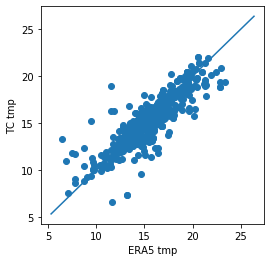

In [113]:
for var in ['tmp',  ]:
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df_all['ERA5_%s_gs_LTavg' % var], df_all['TC_%s_gs_LTavg' % var])
    ax.set_xlabel('ERA5 %s'%var)
    ax.set_ylabel('TC %s'%var)
    lmin = np.min(df_all['TC_%s_gs_LTavg' % var])*0.8
    lmax = np.max(df_all['TC_%s_gs_LTavg' % var])*1.2
    ax.plot([lmin, lmax], [lmin, lmax])
    #ax.set_ylim([lmin, lmax])
    #ax.set_xlim([lmin, lmax])
    plt.show()

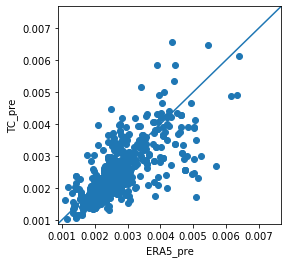

In [114]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(df_all['ERA5_pre_LTavg' ], df_all['TC_pre_LTavg'])
ax.set_xlabel('ERA5_pre')
ax.set_ylabel('TC_pre')
lmin = np.min(df_all['ERA5_pre_LTavg'])*0.8
lmax = np.max(df_all['ERA5_pre_LTavg'])*1.2
ax.plot([lmin, lmax], [lmin, lmax])
ax.set_ylim([lmin, lmax])
ax.set_xlim([lmin, lmax])
plt.show()


